# Traffic Sign Recognition

### Given a color image of traffic sign, the model should recognize which sign it is.

#### Dataset discription: The dataset contains 40,000 images, all different and related to 43 traffic signs.
https://www.kaggle.com/code/yacharki/traffic-signs-image-classification-97-cnn/input?select=Train

In [1]:
N_CLASSES = 43  # Number of classes
RESIZED_IMAGE = (32, 32)  # image size


### IMPORTS

In [2]:
import numpy as np
import os
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential, optimizers, losses


2024-09-15 17:11:02.973938: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-15 17:11:02.982874: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-15 17:11:02.993685: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-15 17:11:02.997031: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-15 17:11:03.005132: I tensorflow/core/platform/cpu_feature_guar

In [3]:
print(tf.__version__)


2.17.0


## Reading data

In [4]:
import pathlib
import glob

batch_size = 64
img_height = 32
img_width = 32

path = "/mnt/c/Users/mbele/desktop/dataset/training"
# data_dir = pathlib.Path(path)
# # .with_suffix('')
# image_count = len(list(data_dir.glob("*/*.png")))
# image_count

train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

class_names = train_ds.class_names


Found 39209 files belonging to 43 classes.
Using 31368 files for training.


I0000 00:00:1726434689.008392    2925 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726434689.132557    2925 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726434689.132611    2925 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726434689.144475    2925 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726434689.144527    2925 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


### Displaying sample images

2024-09-15 17:11:59.099998: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


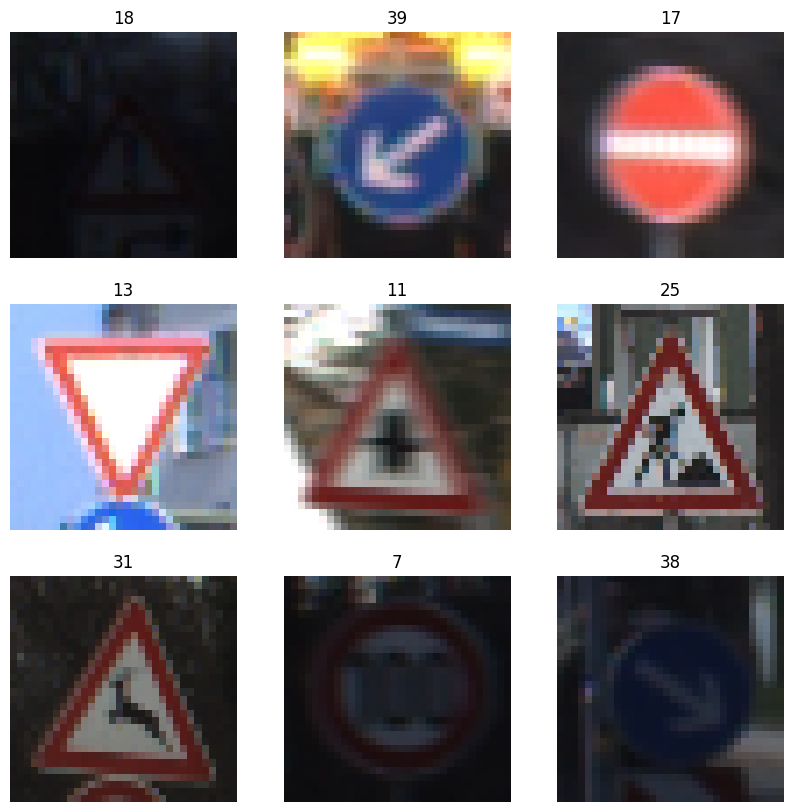

In [5]:
# Display sample images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


## Preprocessing

In [6]:
# Normalize dataset
normalization_layer = layers.Rescaling(1.0 / 255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Cache and prefetch data
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


### Model Architecture
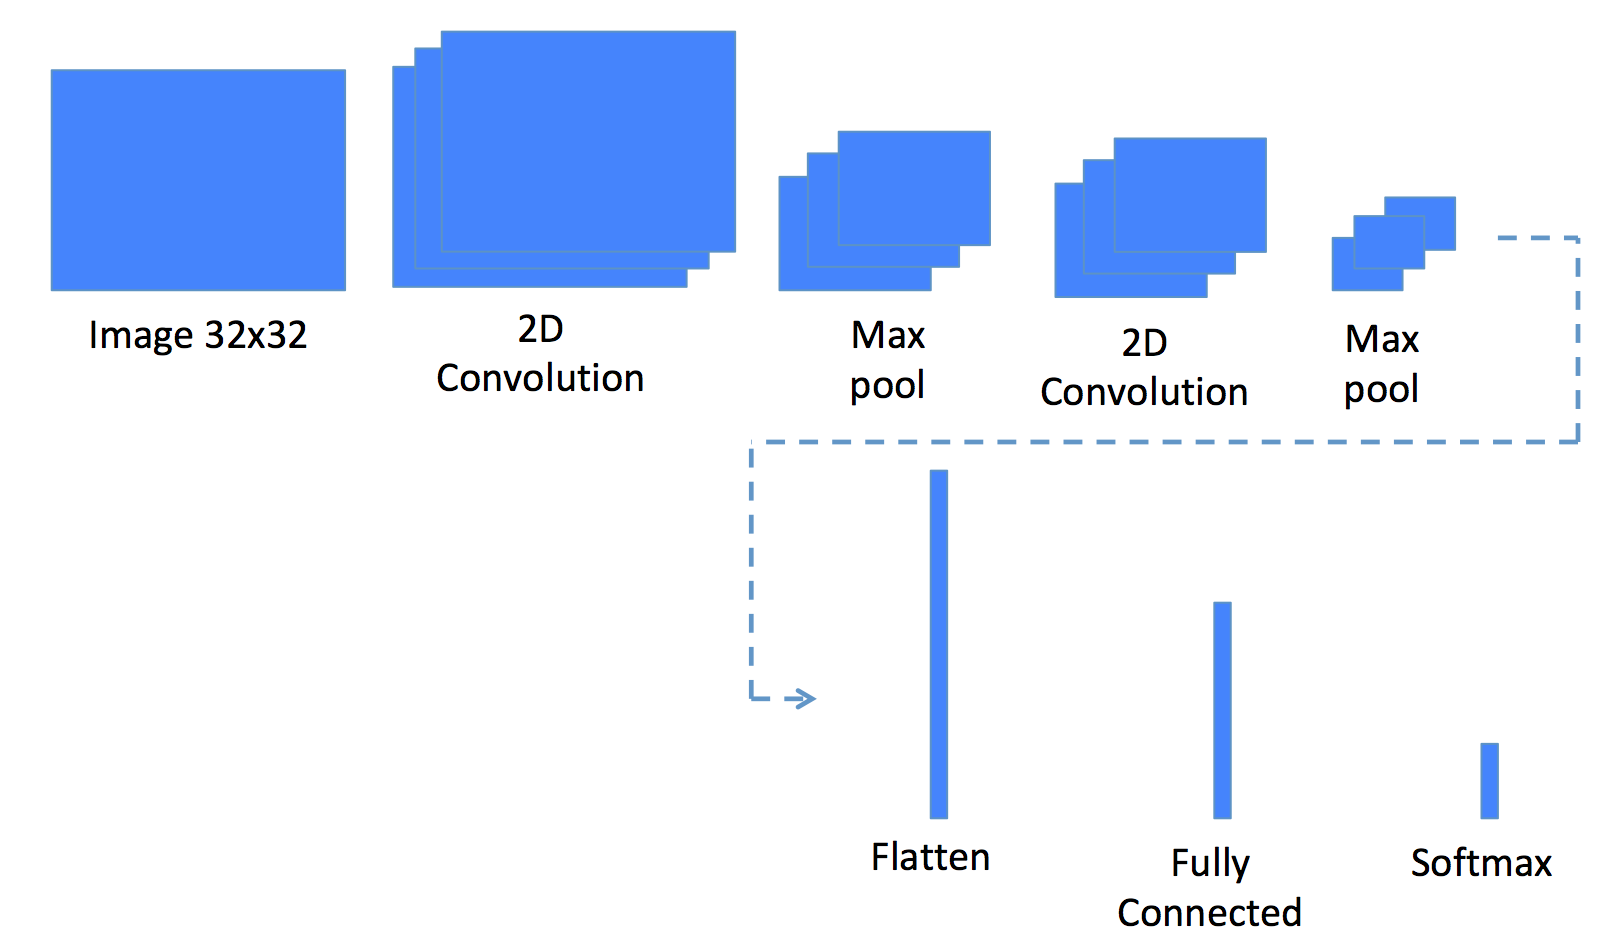
1. 2D convolution, 5x5, 32 filters
2. 2D convolution, 5x5, 64 filters
3. Flattenizer
4. Fully connected later, 1,024 units
5. Dropout 40%
6. Fully connected layer, no activation
7. Softmax output

In [7]:
class TrafficSignNet(tf.keras.Model):
    def __init__(self):
        super(TrafficSignNet, self).__init__()
        self.conv1 = layers.Conv2D(32, kernel_size=5, padding="same", activation="relu")
        self.conv2 = layers.Conv2D(64, kernel_size=5, padding="same", activation="relu")
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(1024, activation="relu")
        self.dropout = layers.Dropout(0.4)
        self.fc2 = layers.Dense(43)  # Number of classes
        self.softmax = layers.Softmax()

    def call(self, inputs, training=True):
        x = self.conv1(inputs)
        x = self.conv2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dropout(x, training=training)
        x = self.fc2(x)
        x = self.softmax(x)
        return x


model = TrafficSignNet()

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss=losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"],
)


# Model training

Epoch 1/20


2024-09-15 17:12:10.908973: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:19: Filling up shuffle buffer (this may take a while): 239 of 1000
2024-09-15 17:12:20.223408: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
I0000 00:00:1726434740.225568    3312 service.cc:146] XLA service 0x7f8b24003c50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726434740.225623    3312 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-09-15 17:12:20.250073: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-15 17:12:20.371122: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  7/491 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.0530 - loss: 5.2324 

I0000 00:00:1726434744.675552    3312 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 82/491 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.1324 - loss: 3.7906

2024-09-15 17:12:27.220919: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_824', 116 bytes spill stores, 116 bytes spill loads



489/491 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4825 - loss: 2.0549

2024-09-15 17:12:39.045975: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_56', 20 bytes spill stores, 20 bytes spill loads

2024-09-15 17:12:39.096201: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_56', 16 bytes spill stores, 16 bytes spill loads

2024-09-15 17:12:39.162868: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_56', 252 bytes spill stores, 252 bytes spill loads

2024-09-15 17:12:45.312881: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_56', 140 bytes spill stores, 140 bytes spill loads

2024-09-15 17:12:45.365802: I external/local_xla/xla/stream_exec

491/491 ━━━━━━━━━━━━━━━━━━━━ 47s 44ms/step - accuracy: 0.4839 - loss: 2.0487 - val_accuracy: 0.9463 - val_loss: 0.2005
Epoch 2/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9521 - loss: 0.1683 - val_accuracy: 0.9686 - val_loss: 0.1148
Epoch 3/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9735 - loss: 0.0892 - val_accuracy: 0.9792 - val_loss: 0.0823
Epoch 4/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9834 - loss: 0.0563 - val_accuracy: 0.9843 - val_loss: 0.0691
Epoch 5/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9881 - loss: 0.0366 - val_accuracy: 0.9842 - val_loss: 0.0706
Epoch 6/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9906 - loss: 0.0294 - val_accuracy: 0.9838 - val_loss: 0.0683
Epoch 7/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9912 - loss: 0.0291 - val_accuracy: 0.9874 - val_loss: 0.0640
Epoch 8/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9944 - loss: 0.0178 - val_accurac

Model: "traffic_sign_net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    67,109,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        44,075 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,622,979 (769.13 MB)

 Trainable params: 67,207,659 (256.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 134,415,320 (512.75 MB)

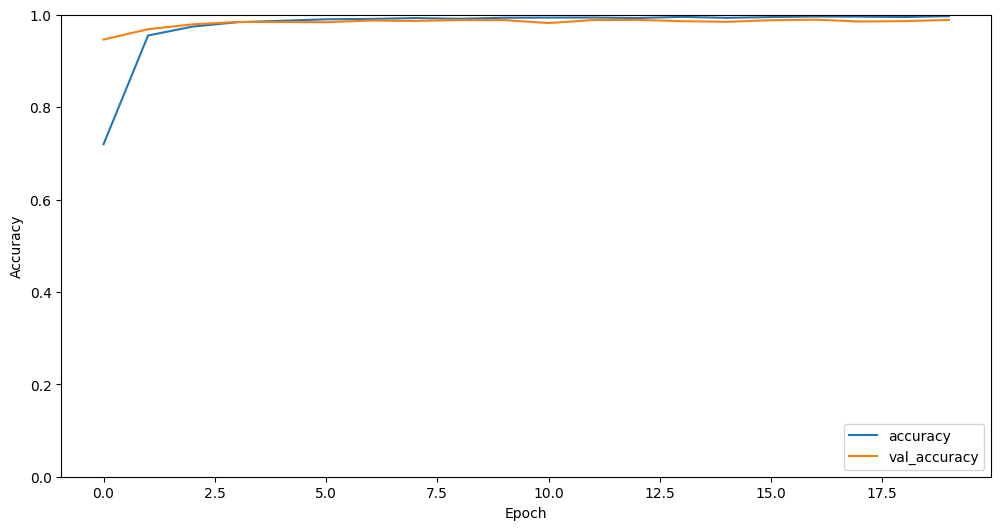

In [8]:
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

# Print the model summary
model.summary()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.show()


2024-09-15 17:16:21.744123: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_35', 16 bytes spill stores, 16 bytes spill loads

2024-09-15 17:16:21.748477: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_35', 20 bytes spill stores, 20 bytes spill loads

2024-09-15 17:16:21.811158: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_35', 252 bytes spill stores, 252 bytes spill loads



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━

2024-09-15 17:16:27.791442: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


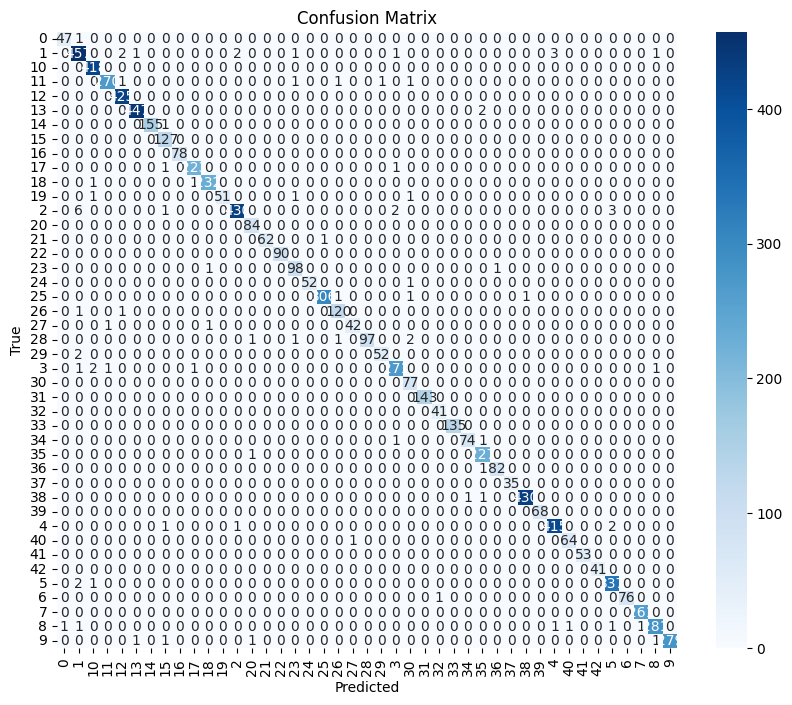

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions for the validation dataset
val_labels = []
val_preds = []

for images, labels in val_ds:
    predictions = model.predict(images)
    val_labels.extend(labels.numpy())
    val_preds.extend(np.argmax(predictions, axis=1))

# Convert lists to numpy arrays
val_labels = np.array(val_labels)
val_preds = np.array(val_preds)

# Classification Report
report = classification_report(val_labels, val_preds, target_names=class_names)
print("Classification Report:\n", report)

# Confusion Matrix
cm = confusion_matrix(val_labels, val_preds)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


### experiments

In [12]:
# from tensorflow.keras import layers, Sequential


# # class Model(tf.keras.Model):
# #     def __init__(self, stride=1):
# #         super(Model, self).__init__()

# #         self.conv1 = layers.Conv2D(32, kernel_size=[5, 5])
# #         self.conv2 = layers.Conv2D(32, kernel_size=[5, 5])
# #         self.fc1 = layers.Dense(3072, activation="relu")
# #         self.fc2 = layers.Dense(43)
# #         self.flatten = layers.Flatten()
# #         self.dropout = layers.Dropout(0.4)

# #     def call(self, inputs, training=None):
# #         out = layers.Rescaling(1.0 / 255, input_shape=(32, 32, 3))
# #         out = self.conv1(inputs)
# #         out = self.conv2(out)
# #         out = self.flatten(out)
# #         out = self.fc1(out)
# #         out = self.dropout(out, training)
# #         out = self.fc2(out)
# #         return tf.nn.softmax(out)


# import tensorflow as tf


# class net(tf.keras.Model):
#     def __init__(self):
#         super(net, self).__init__()
#         # Define the layers
#         self.conv1 = tf.keras.layers.Conv2D(
#             32, kernel_size=5, strides=1, padding="same", activation="relu"
#         )
#         self.conv2 = tf.keras.layers.Conv2D(
#             64, kernel_size=5, strides=1, padding="same", activation="relu"
#         )
#         self.flatten = tf.keras.layers.Flatten()
#         self.fc1 = tf.keras.layers.Dense(1024, activation="relu")
#         self.dropout = tf.keras.layers.Dropout(0.4)
#         self.fc2 = tf.keras.layers.Dense(0)  # Fully connected layer with no activation
#         self.fc3 = tf.keras.layers.Dense(43)  # Assuming 10 classes for Softmax
#         self.softmax = tf.keras.layers.Softmax()

#     def call(self, inputs, training=True):
#         x = self.conv1(inputs)
#         x = self.conv2(x)
#         x = self.flatten(x)
#         x = self.fc1(x)
#         x = self.dropout(x, training=training)
#         x = self.fc2(x)
#         x = self.fc3(x)
#         x = self.softmax(x)  # Apply Softmax activation for the output layer

#         return x


# # Create an instance of the model
# model = net()

# # Build the model with a specified input shape
# model.build(
#     input_shape=(None, 32, 32, 3)
# )  # Example input shape for grayscale images of size 28x28

# # Print the model summary
# model.summary()


In [13]:
# from tensorflow.keras import optimizers, losses

# model = Model()


# model.compile(
#     optimizer=optimizers.Adam(learning_rate=0.01),
#     loss=losses.CategoricalCrossentropy(from_logits=True),
#     metrics=["accuracy"],
# )

# num_epochs = 3
# model.summary()


In [47]:
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [53]:
# normalization_layer = layers.Rescaling(1.0 / 255)
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))


In [14]:
# num_classes = len(class_names)

# model = Sequential(
#     [
#         layers.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
#         layers.Conv2D(16, 3, padding="same", activation="relu"),
#         layers.MaxPooling2D(),
#         layers.Conv2D(32, 3, padding="same", activation="relu"),
#         layers.MaxPooling2D(),
#         layers.Conv2D(64, 3, padding="same", activation="relu"),
#         layers.MaxPooling2D(),
#         layers.Flatten(),
#         layers.Dense(128, activation="relu"),
#         layers.Dense(num_classes),
#     ]
# )


# model.compile(
#     optimizer="adam",
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=["accuracy"],
# )
# model.summary()
